In [150]:
## !pip install torchvision

In [151]:
import os
import torch
import imageio
import torchvision

from torch.utils.data import Dataset

from torchvision import transforms

from sklearn.model_selection import train_test_split

from PIL import Image

import torchvision.transforms as T

import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [248]:
from sklearn.metrics import confusion_matrix
from sklearn.metric import precision_score, recall_score, accuracy_score, f1_score

In [152]:
raw_data_train = r'C:\Users\micke\OneDrive\Documents\ITS 365\CIFAR-10-images-master\train'
raw_data_test  = r'C:\Users\micke\OneDrive\Documents\ITS 365\CIFAR-10-images-master\test'

## Train

In [153]:
dataset_train = []
labels_train  = []
targets_train = []

In [154]:
for folder in os.listdir(raw_data_train):
    print(folder)
    ## print( os.path.join(raw_data_train, folder) )
    for image in os.listdir( os.path.join(raw_data_train, folder) ):
        ## print(image)
        if folder not in labels_train:
            labels_train.append(folder)
        targets_train.append( labels_train.index(folder) )
        
        img_arr = imageio.v2.imread(os.path.join(raw_data_train, folder, image), pilmode="RGB")
        ## resize = torchvision.transforms.Resize(size)
        ## crop_center = torchvision.transforms.CenterCrop(size)

        img = torch.from_numpy(img_arr).permute(2, 0, 1).float()
        ## img = resize(img)
        ## img = crop_center(img)
        img /= 255
        dataset_train.append(img)
        
     

airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck


In [155]:
labels_train

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [156]:
len( targets_train )

50000

In [157]:
dataset_train[1].shape

torch.Size([3, 32, 32])

In [158]:
data_train    = torch.stack(  dataset_train )
targets_train = torch.Tensor( targets_train ).type( torch.LongTensor )

torch.save( (data_train, targets_train, labels_train) , "CIFAR_train_dataset")

## data1, targets1, labels1 = torch.load(dataset_save)

In [159]:
data_train.shape
              

torch.Size([50000, 3, 32, 32])

In [160]:
targets_train.shape

torch.Size([50000])

In [161]:
data_train[2].shape

torch.Size([3, 32, 32])

In [162]:
targets_train[25000:26000]

tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [163]:
img_tr = data_train[1000]
img_tr

tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.9569, 0.9569, 0.9569],
         [1.0000, 1.0000, 1.0000,  ..., 0.9647, 0.9647, 0.9647],
         [1.0000, 1.0000, 1.0000,  ..., 0.9725, 0.9686, 0.9686],
         ...,
         [0.4667, 0.4745, 0.4706,  ..., 0.5137, 0.5137, 0.5176],
         [0.5098, 0.5137, 0.5020,  ..., 0.5490, 0.5490, 0.5490],
         [0.4745, 0.4824, 0.4824,  ..., 0.5647, 0.5647, 0.5608]],

        [[0.9843, 0.9843, 0.9843,  ..., 0.9922, 0.9922, 0.9922],
         [0.9882, 0.9922, 0.9922,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9922,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.3882, 0.3961, 0.3922,  ..., 0.4235, 0.4196, 0.4235],
         [0.4275, 0.4314, 0.4196,  ..., 0.4353, 0.4353, 0.4353],
         [0.3922, 0.4000, 0.3882,  ..., 0.4471, 0.4471, 0.4431]],

        [[0.9843, 0.9843, 0.9843,  ..., 0.9882, 0.9882, 0.9882],
         [0.9882, 0.9882, 0.9882,  ..., 0.9961, 0.9961, 0.9961],
         [0.9882, 0.9882, 0.9961,  ..., 1.0000, 1.0000, 1.

In [164]:
transform = T.ToPILImage()

In [165]:
img = transform(  img_tr  )

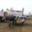

In [166]:
img

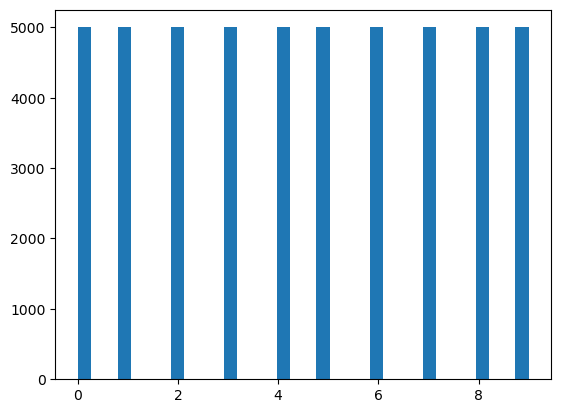

In [167]:
_ = plt.hist( targets_train.numpy(), bins="auto" )
plt.show()

## test data

In [168]:
dataset_test = []
labels_test  = []
targets_test = []

In [169]:
for folder in os.listdir(raw_data_test):
    print(folder)
    ## print( os.path.join(raw_data_train, folder) )
    for image in os.listdir( os.path.join(raw_data_test, folder) ):
        ## print(image)
        if folder not in labels_test:
            labels_test.append(folder)
        targets_test.append( labels_test.index(folder) )
        
        img_arr = imageio.v2.imread(os.path.join(raw_data_test, folder, image), pilmode="RGB")
        ## resize = torchvision.transforms.Resize(size)
        ## crop_center = torchvision.transforms.CenterCrop(size)

        img = torch.from_numpy(img_arr).permute(2, 0, 1).float()
        ## img = resize(img)
        ## img = crop_center(img)
        img /= 255
        dataset_test.append(img)
        

airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck


In [170]:
data_test    = torch.stack(  dataset_test )
targets_test = torch.Tensor( targets_test ).type( torch.LongTensor )

torch.save( (data_test, targets_test, labels_test) , "CIFAR_train_dataset_test")

In [171]:
data_test.shape

torch.Size([10000, 3, 32, 32])

In [172]:
targets_test.shape

torch.Size([10000])

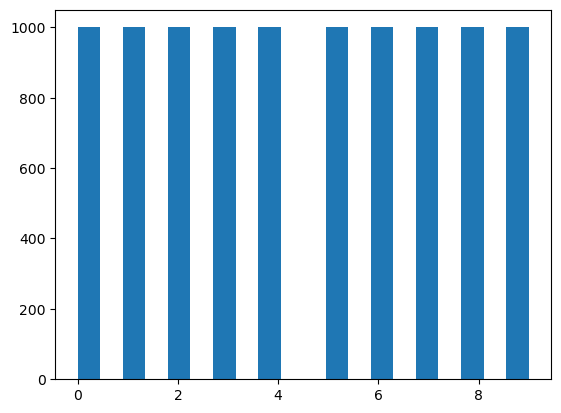

In [173]:
_ = plt.hist( targets_test.numpy(), bins="auto" )
plt.show()

In [174]:

X_train = data_train
y_train = targets_train


In [175]:
X_test = data_test
y_test = targets_test

In [176]:
X_train.shape[0]

50000

In [177]:
y_train[30000].item()

6

In [178]:
CIFAR_train_list = [(X_train[i], y_train[i].item()) for i in range(X_train.shape[0])]

In [179]:
CIFAR_test_list = [(X_test[i], y_test[i].item()) for i in range(X_test.shape[0])]

## data loaders

In [180]:
batch_size = 16

In [181]:
train_dl = torch.utils.data.DataLoader( CIFAR_train_list, batch_size =batch_size, shuffle = True )

In [182]:
tes_dl = torch.utils.data.DataLoader( CIFAR_test_list, batch_size = 10000, shuffle = True )

## architectures 

In [240]:

class MLP_net(nn.Module): 
    ## init the class
    def __init__(self):
        super().__init__()
        
        self.linear1 = nn.Linear( 32*32*3 , 20 )
        self.act1    = nn.Sigmoid()
        self.linear2 = nn.Linear( 20 , 10 )
        self.act2    = nn.Softmax(dim=1)
        
    ## perform inference
    def forward(self, x):
        
        x            = self.linear1(x)
        x            = self.act1(x)
        x            = self.linear2(x)
        y_pred       = self.act2(x)
        
        return y_pred


In [241]:

def training_loop( N_Epochs, model, loss_fn, opt):
    for epoch in range(N_Epochs):
        for xb, yb in train_dl:
            
            xb = xb.view( (16, -1) )
            
            y_pred = model(xb)
            
            loss = loss_fn(y_pred, yb)
            
            opt.zero_grad()
            loss.backward()
            opt.step()
            
        if epoch % 5 == 0:
            print(epoch, "loss=", loss)


## Core Functions

In [242]:

N_Epochs = 5
learning_rate = .001


In [243]:
print(len(train_dl))

3125


In [244]:
for i, (xb, yb) in enumerate(train_dl):
    print(f"Batch {i+1} loaded")
    if i == 4:  # Print only the first 5 batches
        break

Batch 1 loaded
Batch 2 loaded
Batch 3 loaded
Batch 4 loaded
Batch 5 loaded


In [245]:
model = MLP_net()

opt = torch.optim.Adam( model.parameters(), lr=learning_rate, )

loss_fn = nn.CrossEntropyLoss()

In [246]:
print("Length of train_dl:", len(train_dl))  # Debugging line

def training_loop(N_Epochs, model, loss_fn, opt, train_dl):
    for epoch in range(N_Epochs):
        print(f"Epoch {epoch+1}/{N_Epochs}")
        for i, (xb, yb) in enumerate(train_dl):
            print(f"Batch {i+1}/{len(train_dl)}")
            
            # Reshape the input
            xb = xb.view(16, -1)
            
            # Check the shapes
            print(f"Input shape: {xb.shape}")
            print(f"Target shape: {yb.shape}")
            
            # Forward pass
            y_pred = model(xb)
            
            # Check the shape of predictions
            print(f"Prediction shape: {y_pred.shape}")
            
            # Compute the loss
            loss = loss_fn(y_pred, yb)
            
            # Zero gradients
            opt.zero_grad()
            
            # Backward pass
            loss.backward()
            
            # Update the parameters
            opt.step()
            
            print(f"Batch {i+1} completed")

# Run training loop
training_loop(N_Epochs, model, loss_fn, opt, train_dl)

Length of train_dl: 3125
Epoch 1/5
Batch 1/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1 completed
Batch 2/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2 completed
Batch 3/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3 completed
Batch 4/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 4 completed
Batch 5/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 5 completed
Batch 6/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 6 completed
Batch 7/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 7 completed
Batch 

Prediction shape: torch.Size([16, 10])
Batch 62 completed
Batch 63/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 63 completed
Batch 64/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 64 completed
Batch 65/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 65 completed
Batch 66/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 66 completed
Batch 67/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 67 completed
Batch 68/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 68 completed
Batch 69/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Siz

Prediction shape: torch.Size([16, 10])
Batch 121 completed
Batch 122/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 122 completed
Batch 123/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 123 completed
Batch 124/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 124 completed
Batch 125/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 125 completed
Batch 126/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 126 completed
Batch 127/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 127 completed
Batch 128/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 183 completed
Batch 184/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 184 completed
Batch 185/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 185 completed
Batch 186/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 186 completed
Batch 187/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 187 completed
Batch 188/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 188 completed
Batch 189/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 189 completed
Batch 190/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Batch 241 completed
Batch 242/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 242 completed
Batch 243/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 243 completed
Batch 244/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 244 completed
Batch 245/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 245 completed
Batch 246/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 246 completed
Batch 247/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 247 completed
Batch 248/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 248 com

Prediction shape: torch.Size([16, 10])
Batch 302 completed
Batch 303/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 303 completed
Batch 304/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 304 completed
Batch 305/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 305 completed
Batch 306/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 306 completed
Batch 307/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 307 completed
Batch 308/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 308 completed
Batch 309/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 361 completed
Batch 362/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 362 completed
Batch 363/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 363 completed
Batch 364/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 364 completed
Batch 365/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 365 completed
Batch 366/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 366 completed
Batch 367/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 367 completed
Batch 368/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Batch 420 completed
Batch 421/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 421 completed
Batch 422/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 422 completed
Batch 423/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 423 completed
Batch 424/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 424 completed
Batch 425/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 425 completed
Batch 426/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 426 completed
Batch 427/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 427 com

Prediction shape: torch.Size([16, 10])
Batch 481 completed
Batch 482/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 482 completed
Batch 483/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 483 completed
Batch 484/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 484 completed
Batch 485/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 485 completed
Batch 486/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 486 completed
Batch 487/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 487 completed
Batch 488/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 543 completed
Batch 544/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 544 completed
Batch 545/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 545 completed
Batch 546/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 546 completed
Batch 547/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 547 completed
Batch 548/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 548 completed
Batch 549/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 549 completed
Batch 550/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 603 completed
Batch 604/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 604 completed
Batch 605/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 605 completed
Batch 606/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 606 completed
Batch 607/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 607 completed
Batch 608/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 608 completed
Batch 609/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 609 completed
Batch 610/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 662 completed
Batch 663/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 663 completed
Batch 664/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 664 completed
Batch 665/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 665 completed
Batch 666/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 666 completed
Batch 667/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 667 completed
Batch 668/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 668 completed
Batch 669/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 722 completed
Batch 723/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 723 completed
Batch 724/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 724 completed
Batch 725/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 725 completed
Batch 726/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 726 completed
Batch 727/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 727 completed
Batch 728/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 728 completed
Batch 729/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 783 completed
Batch 784/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 784 completed
Batch 785/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 785 completed
Batch 786/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 786 completed
Batch 787/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 787 completed
Batch 788/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 788 completed
Batch 789/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 789 completed
Batch 790/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 843 completed
Batch 844/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 844 completed
Batch 845/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 845 completed
Batch 846/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 846 completed
Batch 847/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 847 completed
Batch 848/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 848 completed
Batch 849/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 849 completed
Batch 850/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 902 completed
Batch 903/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 903 completed
Batch 904/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 904 completed
Batch 905/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 905 completed
Batch 906/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 906 completed
Batch 907/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 907 completed
Batch 908/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 908 completed
Batch 909/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 962 completed
Batch 963/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 963 completed
Batch 964/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 964 completed
Batch 965/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 965 completed
Batch 966/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 966 completed
Batch 967/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 967 completed
Batch 968/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 968 completed
Batch 969/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Batch 1021 completed
Batch 1022/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1022 completed
Batch 1023/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1023 completed
Batch 1024/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1024 completed
Batch 1025/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1025 completed
Batch 1026/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1026 completed
Batch 1027/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1027 completed
Batch 1028/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])

Prediction shape: torch.Size([16, 10])
Batch 1079 completed
Batch 1080/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1080 completed
Batch 1081/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1081 completed
Batch 1082/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1082 completed
Batch 1083/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1083 completed
Batch 1084/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1084 completed
Batch 1085/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1085 completed
Batch 1086/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1138 completed
Batch 1139/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1139 completed
Batch 1140/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1140 completed
Batch 1141/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1141 completed
Batch 1142/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1142 completed
Batch 1143/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1143 completed
Batch 1144/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1144 completed
Batch 1145/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1197 completed
Batch 1198/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1198 completed
Batch 1199/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1199 completed
Batch 1200/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1200 completed
Batch 1201/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1201 completed
Batch 1202/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1202 completed
Batch 1203/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1203 completed
Batch 1204/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1256 completed
Batch 1257/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1257 completed
Batch 1258/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1258 completed
Batch 1259/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1259 completed
Batch 1260/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1260 completed
Batch 1261/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1261 completed
Batch 1262/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1262 completed
Batch 1263/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1315 completed
Batch 1316/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1316 completed
Batch 1317/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1317 completed
Batch 1318/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1318 completed
Batch 1319/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1319 completed
Batch 1320/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1320 completed
Batch 1321/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1321 completed
Batch 1322/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1374 completed
Batch 1375/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1375 completed
Batch 1376/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1376 completed
Batch 1377/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1377 completed
Batch 1378/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1378 completed
Batch 1379/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1379 completed
Batch 1380/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1380 completed
Batch 1381/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1432 completed
Batch 1433/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1433 completed
Batch 1434/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1434 completed
Batch 1435/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1435 completed
Batch 1436/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1436 completed
Batch 1437/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1437 completed
Batch 1438/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1438 completed
Batch 1439/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1490 completed
Batch 1491/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1491 completed
Batch 1492/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1492 completed
Batch 1493/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1493 completed
Batch 1494/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1494 completed
Batch 1495/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1495 completed
Batch 1496/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1496 completed
Batch 1497/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1551 completed
Batch 1552/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1552 completed
Batch 1553/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1553 completed
Batch 1554/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1554 completed
Batch 1555/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1555 completed
Batch 1556/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1556 completed
Batch 1557/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1557 completed
Batch 1558/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1609 completed
Batch 1610/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1610 completed
Batch 1611/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1611 completed
Batch 1612/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1612 completed
Batch 1613/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1613 completed
Batch 1614/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1614 completed
Batch 1615/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1615 completed
Batch 1616/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1669 completed
Batch 1670/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1670 completed
Batch 1671/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1671 completed
Batch 1672/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1672 completed
Batch 1673/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1673 completed
Batch 1674/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1674 completed
Batch 1675/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1675 completed
Batch 1676/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1730 completed
Batch 1731/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1731 completed
Batch 1732/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1732 completed
Batch 1733/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1733 completed
Batch 1734/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1734 completed
Batch 1735/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1735 completed
Batch 1736/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1736 completed
Batch 1737/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Batch 1788 completed
Batch 1789/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1789 completed
Batch 1790/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1790 completed
Batch 1791/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1791 completed
Batch 1792/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1792 completed
Batch 1793/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1793 completed
Batch 1794/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1794 completed
Batch 1795/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])

Prediction shape: torch.Size([16, 10])
Batch 1846 completed
Batch 1847/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1847 completed
Batch 1848/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1848 completed
Batch 1849/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1849 completed
Batch 1850/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1850 completed
Batch 1851/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1851 completed
Batch 1852/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1852 completed
Batch 1853/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1904 completed
Batch 1905/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1905 completed
Batch 1906/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1906 completed
Batch 1907/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1907 completed
Batch 1908/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1908 completed
Batch 1909/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1909 completed
Batch 1910/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1910 completed
Batch 1911/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1965 completed
Batch 1966/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1966 completed
Batch 1967/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1967 completed
Batch 1968/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1968 completed
Batch 1969/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1969 completed
Batch 1970/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1970 completed
Batch 1971/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1971 completed
Batch 1972/3125

Prediction shape: torch.Size([16, 10])
Batch 2024 completed
Batch 2025/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2025 completed
Batch 2026/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2026 completed
Batch 2027/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2027 completed
Batch 2028/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2028 completed
Batch 2029/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2029 completed
Batch 2030/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2030 completed
Batch 2031/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2082 completed
Batch 2083/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2083 completed
Batch 2084/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2084 completed
Batch 2085/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2085 completed
Batch 2086/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2086 completed
Batch 2087/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2087 completed
Batch 2088/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2088 completed
Batch 2089/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2141 completed
Batch 2142/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2142 completed
Batch 2143/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2143 completed
Batch 2144/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2144 completed
Batch 2145/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2145 completed
Batch 2146/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2146 completed
Batch 2147/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2147 completed
Batch 2148/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Batch 2199/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2199 completed
Batch 2200/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2200 completed
Batch 2201/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2201 completed
Batch 2202/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2202 completed
Batch 2203/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2203 completed
Batch 2204/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2204 completed
Batch 2205/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2205 completed

Prediction shape: torch.Size([16, 10])
Batch 2257 completed
Batch 2258/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2258 completed
Batch 2259/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2259 completed
Batch 2260/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2260 completed
Batch 2261/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2261 completed
Batch 2262/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2262 completed
Batch 2263/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2263 completed
Batch 2264/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2316 completed
Batch 2317/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2317 completed
Batch 2318/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2318 completed
Batch 2319/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2319 completed
Batch 2320/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2320 completed
Batch 2321/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2321 completed
Batch 2322/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2322 completed
Batch 2323/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2374 completed
Batch 2375/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2375 completed
Batch 2376/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2376 completed
Batch 2377/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2377 completed
Batch 2378/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2378 completed
Batch 2379/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2379 completed
Batch 2380/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2380 completed
Batch 2381/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2432 completed
Batch 2433/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2433 completed
Batch 2434/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2434 completed
Batch 2435/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2435 completed
Batch 2436/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2436 completed
Batch 2437/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2437 completed
Batch 2438/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2438 completed
Batch 2439/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2491 completed
Batch 2492/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2492 completed
Batch 2493/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2493 completed
Batch 2494/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2494 completed
Batch 2495/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2495 completed
Batch 2496/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2496 completed
Batch 2497/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2497 completed
Batch 2498/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2551 completed
Batch 2552/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2552 completed
Batch 2553/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2553 completed
Batch 2554/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2554 completed
Batch 2555/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2555 completed
Batch 2556/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2556 completed
Batch 2557/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2557 completed
Batch 2558/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2610 completed
Batch 2611/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2611 completed
Batch 2612/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2612 completed
Batch 2613/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2613 completed
Batch 2614/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2614 completed
Batch 2615/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2615 completed
Batch 2616/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2616 completed
Batch 2617/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2670 completed
Batch 2671/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2671 completed
Batch 2672/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2672 completed
Batch 2673/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2673 completed
Batch 2674/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2674 completed
Batch 2675/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2675 completed
Batch 2676/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2676 completed
Batch 2677/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2729 completed
Batch 2730/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2730 completed
Batch 2731/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2731 completed
Batch 2732/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2732 completed
Batch 2733/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2733 completed
Batch 2734/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2734 completed
Batch 2735/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2735 completed
Batch 2736/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2790 completed
Batch 2791/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2791 completed
Batch 2792/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2792 completed
Batch 2793/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2793 completed
Batch 2794/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2794 completed
Batch 2795/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2795 completed
Batch 2796/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2796 completed
Batch 2797/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2848 completed
Batch 2849/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2849 completed
Batch 2850/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2850 completed
Batch 2851/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2851 completed
Batch 2852/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2852 completed
Batch 2853/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2853 completed
Batch 2854/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2854 completed
Batch 2855/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2909 completed
Batch 2910/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2910 completed
Batch 2911/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2911 completed
Batch 2912/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2912 completed
Batch 2913/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2913 completed
Batch 2914/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2914 completed
Batch 2915/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2915 completed
Batch 2916/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2969 completed
Batch 2970/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2970 completed
Batch 2971/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2971 completed
Batch 2972/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2972 completed
Batch 2973/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2973 completed
Batch 2974/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2974 completed
Batch 2975/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2975 completed
Batch 2976/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 3027 completed
Batch 3028/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3028 completed
Batch 3029/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3029 completed
Batch 3030/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3030 completed
Batch 3031/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3031 completed
Batch 3032/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3032 completed
Batch 3033/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3033 completed
Batch 3034/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 3088 completed
Batch 3089/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3089 completed
Batch 3090/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3090 completed
Batch 3091/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3091 completed
Batch 3092/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3092 completed
Batch 3093/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3093 completed
Batch 3094/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3094 completed
Batch 3095/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 22 completed
Batch 23/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 23 completed
Batch 24/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 24 completed
Batch 25/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 25 completed
Batch 26/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 26 completed
Batch 27/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 27 completed
Batch 28/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 28 completed
Batch 29/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Siz

Prediction shape: torch.Size([16, 10])
Batch 82 completed
Batch 83/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 83 completed
Batch 84/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 84 completed
Batch 85/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 85 completed
Batch 86/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 86 completed
Batch 87/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 87 completed
Batch 88/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 88 completed
Batch 89/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Siz

Prediction shape: torch.Size([16, 10])
Batch 143 completed
Batch 144/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 144 completed
Batch 145/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 145 completed
Batch 146/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 146 completed
Batch 147/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 147 completed
Batch 148/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 148 completed
Batch 149/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 149 completed
Batch 150/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 204 completed
Batch 205/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 205 completed
Batch 206/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 206 completed
Batch 207/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 207 completed
Batch 208/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 208 completed
Batch 209/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 209 completed
Batch 210/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 210 completed
Batch 211/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 266 completed
Batch 267/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 267 completed
Batch 268/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 268 completed
Batch 269/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 269 completed
Batch 270/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 270 completed
Batch 271/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 271 completed
Batch 272/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 272 completed
Batch 273/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 325 completed
Batch 326/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 326 completed
Batch 327/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 327 completed
Batch 328/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 328 completed
Batch 329/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 329 completed
Batch 330/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 330 completed
Batch 331/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 331 completed
Batch 332/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 386 completed
Batch 387/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 387 completed
Batch 388/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 388 completed
Batch 389/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 389 completed
Batch 390/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 390 completed
Batch 391/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 391 completed
Batch 392/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 392 completed
Batch 393/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 445 completed
Batch 446/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 446 completed
Batch 447/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 447 completed
Batch 448/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 448 completed
Batch 449/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 449 completed
Batch 450/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 450 completed
Batch 451/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 451 completed
Batch 452/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 506 completed
Batch 507/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 507 completed
Batch 508/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 508 completed
Batch 509/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 509 completed
Batch 510/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 510 completed
Batch 511/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 511 completed
Batch 512/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 512 completed
Batch 513/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 566 completed
Batch 567/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 567 completed
Batch 568/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 568 completed
Batch 569/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 569 completed
Batch 570/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 570 completed
Batch 571/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 571 completed
Batch 572/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 572 completed
Batch 573/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 627 completed
Batch 628/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 628 completed
Batch 629/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 629 completed
Batch 630/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 630 completed
Batch 631/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 631 completed
Batch 632/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 632 completed
Batch 633/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 633 completed
Batch 634/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 686 completed
Batch 687/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 687 completed
Batch 688/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 688 completed
Batch 689/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 689 completed
Batch 690/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 690 completed
Batch 691/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 691 completed
Batch 692/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 692 completed
Batch 693/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 745 completed
Batch 746/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 746 completed
Batch 747/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 747 completed
Batch 748/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 748 completed
Batch 749/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 749 completed
Batch 750/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 750 completed
Batch 751/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 751 completed
Batch 752/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Batch 804 completed
Batch 805/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 805 completed
Batch 806/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 806 completed
Batch 807/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 807 completed
Batch 808/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 808 completed
Batch 809/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 809 completed
Batch 810/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 810 completed
Batch 811/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 811 com

Prediction shape: torch.Size([16, 10])
Batch 865 completed
Batch 866/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 866 completed
Batch 867/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 867 completed
Batch 868/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 868 completed
Batch 869/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 869 completed
Batch 870/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 870 completed
Batch 871/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 871 completed
Batch 872/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 925 completed
Batch 926/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 926 completed
Batch 927/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 927 completed
Batch 928/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 928 completed
Batch 929/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 929 completed
Batch 930/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 930 completed
Batch 931/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 931 completed
Batch 932/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 985 completed
Batch 986/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 986 completed
Batch 987/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 987 completed
Batch 988/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 988 completed
Batch 989/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 989 completed
Batch 990/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 990 completed
Batch 991/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 991 completed
Batch 992/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 1043 completed
Batch 1044/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1044 completed
Batch 1045/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1045 completed
Batch 1046/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1046 completed
Batch 1047/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1047 completed
Batch 1048/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1048 completed
Batch 1049/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1049 completed
Batch 1050/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1104 completed
Batch 1105/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1105 completed
Batch 1106/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1106 completed
Batch 1107/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1107 completed
Batch 1108/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1108 completed
Batch 1109/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1109 completed
Batch 1110/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1110 completed
Batch 1111/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1162 completed
Batch 1163/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1163 completed
Batch 1164/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1164 completed
Batch 1165/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1165 completed
Batch 1166/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1166 completed
Batch 1167/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1167 completed
Batch 1168/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1168 completed
Batch 1169/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1222 completed
Batch 1223/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1223 completed
Batch 1224/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1224 completed
Batch 1225/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1225 completed
Batch 1226/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1226 completed
Batch 1227/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1227 completed
Batch 1228/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1228 completed
Batch 1229/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1280 completed
Batch 1281/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1281 completed
Batch 1282/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1282 completed
Batch 1283/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1283 completed
Batch 1284/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1284 completed
Batch 1285/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1285 completed
Batch 1286/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1286 completed
Batch 1287/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1341 completed
Batch 1342/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1342 completed
Batch 1343/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1343 completed
Batch 1344/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1344 completed
Batch 1345/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1345 completed
Batch 1346/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1346 completed
Batch 1347/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1347 completed
Batch 1348/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1402 completed
Batch 1403/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1403 completed
Batch 1404/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1404 completed
Batch 1405/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1405 completed
Batch 1406/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1406 completed
Batch 1407/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1407 completed
Batch 1408/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1408 completed
Batch 1409/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1460 completed
Batch 1461/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1461 completed
Batch 1462/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1462 completed
Batch 1463/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1463 completed
Batch 1464/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1464 completed
Batch 1465/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1465 completed
Batch 1466/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1466 completed
Batch 1467/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1518 completed
Batch 1519/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1519 completed
Batch 1520/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1520 completed
Batch 1521/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1521 completed
Batch 1522/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1522 completed
Batch 1523/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1523 completed
Batch 1524/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1524 completed
Batch 1525/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1578 completed
Batch 1579/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1579 completed
Batch 1580/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1580 completed
Batch 1581/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1581 completed
Batch 1582/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1582 completed
Batch 1583/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1583 completed
Batch 1584/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1584 completed
Batch 1585/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1638 completed
Batch 1639/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1639 completed
Batch 1640/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1640 completed
Batch 1641/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1641 completed
Batch 1642/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1642 completed
Batch 1643/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1643 completed
Batch 1644/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1644 completed
Batch 1645/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1696 completed
Batch 1697/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1697 completed
Batch 1698/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1698 completed
Batch 1699/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1699 completed
Batch 1700/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1700 completed
Batch 1701/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1701 completed
Batch 1702/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1702 completed
Batch 1703/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1754 completed
Batch 1755/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1755 completed
Batch 1756/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1756 completed
Batch 1757/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1757 completed
Batch 1758/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1758 completed
Batch 1759/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1759 completed
Batch 1760/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1760 completed
Batch 1761/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1813 completed
Batch 1814/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1814 completed
Batch 1815/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1815 completed
Batch 1816/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1816 completed
Batch 1817/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1817 completed
Batch 1818/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1818 completed
Batch 1819/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1819 completed
Batch 1820/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1875 completed
Batch 1876/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1876 completed
Batch 1877/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1877 completed
Batch 1878/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1878 completed
Batch 1879/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1879 completed
Batch 1880/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1880 completed
Batch 1881/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1881 completed
Batch 1882/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1933 completed
Batch 1934/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1934 completed
Batch 1935/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1935 completed
Batch 1936/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1936 completed
Batch 1937/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1937 completed
Batch 1938/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1938 completed
Batch 1939/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1939 completed
Batch 1940/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1991 completed
Batch 1992/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1992 completed
Batch 1993/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1993 completed
Batch 1994/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1994 completed
Batch 1995/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1995 completed
Batch 1996/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1996 completed
Batch 1997/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1997 completed
Batch 1998/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2049 completed
Batch 2050/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2050 completed
Batch 2051/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2051 completed
Batch 2052/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2052 completed
Batch 2053/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2053 completed
Batch 2054/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2054 completed
Batch 2055/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2055 completed
Batch 2056/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2108 completed
Batch 2109/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2109 completed
Batch 2110/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2110 completed
Batch 2111/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2111 completed
Batch 2112/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2112 completed
Batch 2113/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2113 completed
Batch 2114/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2114 completed
Batch 2115/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2166 completed
Batch 2167/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2167 completed
Batch 2168/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2168 completed
Batch 2169/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2169 completed
Batch 2170/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2170 completed
Batch 2171/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2171 completed
Batch 2172/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2172 completed
Batch 2173/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2224 completed
Batch 2225/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2225 completed
Batch 2226/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2226 completed
Batch 2227/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2227 completed
Batch 2228/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2228 completed
Batch 2229/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2229 completed
Batch 2230/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2230 completed
Batch 2231/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2284 completed
Batch 2285/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2285 completed
Batch 2286/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2286 completed
Batch 2287/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2287 completed
Batch 2288/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2288 completed
Batch 2289/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2289 completed
Batch 2290/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2290 completed
Batch 2291/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2342 completed
Batch 2343/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2343 completed
Batch 2344/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2344 completed
Batch 2345/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2345 completed
Batch 2346/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2346 completed
Batch 2347/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2347 completed
Batch 2348/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2348 completed
Batch 2349/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2402 completed
Batch 2403/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2403 completed
Batch 2404/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2404 completed
Batch 2405/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2405 completed
Batch 2406/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2406 completed
Batch 2407/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2407 completed
Batch 2408/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2408 completed
Batch 2409/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Batch 2461/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2461 completed
Batch 2462/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2462 completed
Batch 2463/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2463 completed
Batch 2464/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2464 completed
Batch 2465/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2465 completed
Batch 2466/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2466 completed
Batch 2467/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2467 completed

Prediction shape: torch.Size([16, 10])
Batch 2519 completed
Batch 2520/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2520 completed
Batch 2521/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2521 completed
Batch 2522/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2522 completed
Batch 2523/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2523 completed
Batch 2524/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2524 completed
Batch 2525/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2525 completed
Batch 2526/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2579 completed
Batch 2580/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2580 completed
Batch 2581/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2581 completed
Batch 2582/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2582 completed
Batch 2583/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2583 completed
Batch 2584/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2584 completed
Batch 2585/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2585 completed
Batch 2586/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2640 completed
Batch 2641/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2641 completed
Batch 2642/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2642 completed
Batch 2643/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2643 completed
Batch 2644/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2644 completed
Batch 2645/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2645 completed
Batch 2646/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2646 completed
Batch 2647/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2699 completed
Batch 2700/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2700 completed
Batch 2701/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2701 completed
Batch 2702/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2702 completed
Batch 2703/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2703 completed
Batch 2704/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2704 completed
Batch 2705/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2705 completed
Batch 2706/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2759 completed
Batch 2760/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2760 completed
Batch 2761/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2761 completed
Batch 2762/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2762 completed
Batch 2763/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2763 completed
Batch 2764/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2764 completed
Batch 2765/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2765 completed
Batch 2766/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2817 completed
Batch 2818/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2818 completed
Batch 2819/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2819 completed
Batch 2820/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2820 completed
Batch 2821/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2821 completed
Batch 2822/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2822 completed
Batch 2823/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2823 completed
Batch 2824/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2876 completed
Batch 2877/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2877 completed
Batch 2878/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2878 completed
Batch 2879/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2879 completed
Batch 2880/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2880 completed
Batch 2881/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2881 completed
Batch 2882/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2882 completed
Batch 2883/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Batch 2934 completed
Batch 2935/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2935 completed
Batch 2936/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2936 completed
Batch 2937/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2937 completed
Batch 2938/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2938 completed
Batch 2939/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2939 completed
Batch 2940/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2940 completed
Batch 2941/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])

Prediction shape: torch.Size([16, 10])
Batch 2993 completed
Batch 2994/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2994 completed
Batch 2995/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2995 completed
Batch 2996/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2996 completed
Batch 2997/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2997 completed
Batch 2998/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2998 completed
Batch 2999/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2999 completed
Batch 3000/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 3052 completed
Batch 3053/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3053 completed
Batch 3054/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3054 completed
Batch 3055/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3055 completed
Batch 3056/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3056 completed
Batch 3057/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3057 completed
Batch 3058/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3058 completed
Batch 3059/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 3110 completed
Batch 3111/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3111 completed
Batch 3112/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3112 completed
Batch 3113/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3113 completed
Batch 3114/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3114 completed
Batch 3115/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3115 completed
Batch 3116/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3116 completed
Batch 3117/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 46 completed
Batch 47/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 47 completed
Batch 48/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 48 completed
Batch 49/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 49 completed
Batch 50/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 50 completed
Batch 51/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 51 completed
Batch 52/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 52 completed
Batch 53/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Siz

Batch 107 completed
Batch 108/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 108 completed
Batch 109/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 109 completed
Batch 110/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 110 completed
Batch 111/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 111 completed
Batch 112/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 112 completed
Batch 113/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 113 completed
Batch 114/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 114 com

Prediction shape: torch.Size([16, 10])
Batch 167 completed
Batch 168/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 168 completed
Batch 169/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 169 completed
Batch 170/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 170 completed
Batch 171/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 171 completed
Batch 172/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 172 completed
Batch 173/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 173 completed
Batch 174/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 228 completed
Batch 229/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 229 completed
Batch 230/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 230 completed
Batch 231/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 231 completed
Batch 232/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 232 completed
Batch 233/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 233 completed
Batch 234/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 234 completed
Batch 235/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 288 completed
Batch 289/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 289 completed
Batch 290/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 290 completed
Batch 291/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 291 completed
Batch 292/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 292 completed
Batch 293/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 293 completed
Batch 294/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 294 completed
Batch 295/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 347 completed
Batch 348/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 348 completed
Batch 349/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 349 completed
Batch 350/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 350 completed
Batch 351/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 351 completed
Batch 352/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 352 completed
Batch 353/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 353 completed
Batch 354/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 406 completed
Batch 407/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 407 completed
Batch 408/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 408 completed
Batch 409/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 409 completed
Batch 410/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 410 completed
Batch 411/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 411 completed
Batch 412/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 412 completed
Batch 413/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 466 completed
Batch 467/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 467 completed
Batch 468/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 468 completed
Batch 469/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 469 completed
Batch 470/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 470 completed
Batch 471/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 471 completed
Batch 472/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 472 completed
Batch 473/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 527 completed
Batch 528/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 528 completed
Batch 529/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 529 completed
Batch 530/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 530 completed
Batch 531/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 531 completed
Batch 532/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 532 completed
Batch 533/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 533 completed
Batch 534/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 586 completed
Batch 587/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 587 completed
Batch 588/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 588 completed
Batch 589/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 589 completed
Batch 590/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 590 completed
Batch 591/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 591 completed
Batch 592/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 592 completed
Batch 593/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 647 completed
Batch 648/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 648 completed
Batch 649/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 649 completed
Batch 650/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 650 completed
Batch 651/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 651 completed
Batch 652/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 652 completed
Batch 653/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 653 completed
Batch 654/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 707 completed
Batch 708/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 708 completed
Batch 709/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 709 completed
Batch 710/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 710 completed
Batch 711/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 711 completed
Batch 712/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 712 completed
Batch 713/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 713 completed
Batch 714/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 768 completed
Batch 769/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 769 completed
Batch 770/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 770 completed
Batch 771/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 771 completed
Batch 772/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 772 completed
Batch 773/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 773 completed
Batch 774/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 774 completed
Batch 775/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Batch 829 completed
Batch 830/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 830 completed
Batch 831/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 831 completed
Batch 832/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 832 completed
Batch 833/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 833 completed
Batch 834/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 834 completed
Batch 835/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 835 completed
Batch 836/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 836 com

Prediction shape: torch.Size([16, 10])
Batch 889 completed
Batch 890/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 890 completed
Batch 891/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 891 completed
Batch 892/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 892 completed
Batch 893/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 893 completed
Batch 894/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 894 completed
Batch 895/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 895 completed
Batch 896/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 951 completed
Batch 952/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 952 completed
Batch 953/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 953 completed
Batch 954/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 954 completed
Batch 955/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 955 completed
Batch 956/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 956 completed
Batch 957/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 957 completed
Batch 958/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 1011 completed
Batch 1012/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1012 completed
Batch 1013/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1013 completed
Batch 1014/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1014 completed
Batch 1015/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1015 completed
Batch 1016/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1016 completed
Batch 1017/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1017 completed
Batch 1018/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1070 completed
Batch 1071/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1071 completed
Batch 1072/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1072 completed
Batch 1073/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1073 completed
Batch 1074/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1074 completed
Batch 1075/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1075 completed
Batch 1076/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1076 completed
Batch 1077/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Batch 1128 completed
Batch 1129/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1129 completed
Batch 1130/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1130 completed
Batch 1131/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1131 completed
Batch 1132/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1132 completed
Batch 1133/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1133 completed
Batch 1134/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1134 completed
Batch 1135/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])

Prediction shape: torch.Size([16, 10])
Batch 1189 completed
Batch 1190/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1190 completed
Batch 1191/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1191 completed
Batch 1192/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1192 completed
Batch 1193/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1193 completed
Batch 1194/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1194 completed
Batch 1195/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1195 completed
Batch 1196/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1250 completed
Batch 1251/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1251 completed
Batch 1252/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1252 completed
Batch 1253/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1253 completed
Batch 1254/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1254 completed
Batch 1255/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1255 completed
Batch 1256/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1256 completed
Batch 1257/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Batch 1308 completed
Batch 1309/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1309 completed
Batch 1310/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1310 completed
Batch 1311/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1311 completed
Batch 1312/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1312 completed
Batch 1313/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1313 completed
Batch 1314/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1314 completed
Batch 1315/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])

Prediction shape: torch.Size([16, 10])
Batch 1367 completed
Batch 1368/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1368 completed
Batch 1369/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1369 completed
Batch 1370/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1370 completed
Batch 1371/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1371 completed
Batch 1372/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1372 completed
Batch 1373/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1373 completed
Batch 1374/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1426 completed
Batch 1427/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1427 completed
Batch 1428/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1428 completed
Batch 1429/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1429 completed
Batch 1430/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1430 completed
Batch 1431/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1431 completed
Batch 1432/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1432 completed
Batch 1433/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1487 completed
Batch 1488/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1488 completed
Batch 1489/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1489 completed
Batch 1490/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1490 completed
Batch 1491/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1491 completed
Batch 1492/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1492 completed
Batch 1493/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1493 completed
Batch 1494/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1545 completed
Batch 1546/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1546 completed
Batch 1547/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1547 completed
Batch 1548/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1548 completed
Batch 1549/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1549 completed
Batch 1550/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1550 completed
Batch 1551/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1551 completed
Batch 1552/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1605 completed
Batch 1606/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1606 completed
Batch 1607/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1607 completed
Batch 1608/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1608 completed
Batch 1609/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1609 completed
Batch 1610/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1610 completed
Batch 1611/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1611 completed
Batch 1612/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1663 completed
Batch 1664/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1664 completed
Batch 1665/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1665 completed
Batch 1666/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1666 completed
Batch 1667/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1667 completed
Batch 1668/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1668 completed
Batch 1669/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1669 completed
Batch 1670/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Batch 1722 completed
Batch 1723/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1723 completed
Batch 1724/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1724 completed
Batch 1725/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1725 completed
Batch 1726/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1726 completed
Batch 1727/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1727 completed
Batch 1728/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1728 completed
Batch 1729/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])

Batch 1782 completed
Batch 1783/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1783 completed
Batch 1784/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1784 completed
Batch 1785/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1785 completed
Batch 1786/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1786 completed
Batch 1787/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1787 completed
Batch 1788/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1788 completed
Batch 1789/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])

Prediction shape: torch.Size([16, 10])
Batch 1840 completed
Batch 1841/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1841 completed
Batch 1842/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1842 completed
Batch 1843/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1843 completed
Batch 1844/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1844 completed
Batch 1845/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1845 completed
Batch 1846/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1846 completed
Batch 1847/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1898 completed
Batch 1899/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1899 completed
Batch 1900/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1900 completed
Batch 1901/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1901 completed
Batch 1902/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1902 completed
Batch 1903/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1903 completed
Batch 1904/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1904 completed
Batch 1905/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1957 completed
Batch 1958/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1958 completed
Batch 1959/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1959 completed
Batch 1960/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1960 completed
Batch 1961/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1961 completed
Batch 1962/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1962 completed
Batch 1963/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1963 completed
Batch 1964/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2015 completed
Batch 2016/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2016 completed
Batch 2017/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2017 completed
Batch 2018/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2018 completed
Batch 2019/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2019 completed
Batch 2020/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2020 completed
Batch 2021/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2021 completed
Batch 2022/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2076 completed
Batch 2077/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2077 completed
Batch 2078/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2078 completed
Batch 2079/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2079 completed
Batch 2080/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2080 completed
Batch 2081/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2081 completed
Batch 2082/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2082 completed
Batch 2083/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2137 completed
Batch 2138/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2138 completed
Batch 2139/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2139 completed
Batch 2140/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2140 completed
Batch 2141/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2141 completed
Batch 2142/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2142 completed
Batch 2143/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2143 completed
Batch 2144/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2198 completed
Batch 2199/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2199 completed
Batch 2200/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2200 completed
Batch 2201/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2201 completed
Batch 2202/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2202 completed
Batch 2203/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2203 completed
Batch 2204/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2204 completed
Batch 2205/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2256 completed
Batch 2257/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2257 completed
Batch 2258/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2258 completed
Batch 2259/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2259 completed
Batch 2260/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2260 completed
Batch 2261/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2261 completed
Batch 2262/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2262 completed
Batch 2263/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2317 completed
Batch 2318/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2318 completed
Batch 2319/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2319 completed
Batch 2320/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2320 completed
Batch 2321/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2321 completed
Batch 2322/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2322 completed
Batch 2323/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2323 completed
Batch 2324/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2378 completed
Batch 2379/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2379 completed
Batch 2380/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2380 completed
Batch 2381/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2381 completed
Batch 2382/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2382 completed
Batch 2383/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2383 completed
Batch 2384/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2384 completed
Batch 2385/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2438 completed
Batch 2439/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2439 completed
Batch 2440/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2440 completed
Batch 2441/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2441 completed
Batch 2442/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2442 completed
Batch 2443/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2443 completed
Batch 2444/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2444 completed
Batch 2445/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2496 completed
Batch 2497/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2497 completed
Batch 2498/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2498 completed
Batch 2499/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2499 completed
Batch 2500/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2500 completed
Batch 2501/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2501 completed
Batch 2502/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2502 completed
Batch 2503/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2554 completed
Batch 2555/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2555 completed
Batch 2556/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2556 completed
Batch 2557/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2557 completed
Batch 2558/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2558 completed
Batch 2559/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2559 completed
Batch 2560/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2560 completed
Batch 2561/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2613 completed
Batch 2614/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2614 completed
Batch 2615/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2615 completed
Batch 2616/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2616 completed
Batch 2617/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2617 completed
Batch 2618/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2618 completed
Batch 2619/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2619 completed
Batch 2620/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2672 completed
Batch 2673/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2673 completed
Batch 2674/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2674 completed
Batch 2675/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2675 completed
Batch 2676/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2676 completed
Batch 2677/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2677 completed
Batch 2678/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2678 completed
Batch 2679/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Batch 2732 completed
Batch 2733/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2733 completed
Batch 2734/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2734 completed
Batch 2735/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2735 completed
Batch 2736/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2736 completed
Batch 2737/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2737 completed
Batch 2738/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2738 completed
Batch 2739/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])

Prediction shape: torch.Size([16, 10])
Batch 2791 completed
Batch 2792/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2792 completed
Batch 2793/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2793 completed
Batch 2794/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2794 completed
Batch 2795/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2795 completed
Batch 2796/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2796 completed
Batch 2797/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2797 completed
Batch 2798/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Batch 2849 completed
Batch 2850/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2850 completed
Batch 2851/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2851 completed
Batch 2852/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2852 completed
Batch 2853/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2853 completed
Batch 2854/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2854 completed
Batch 2855/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2855 completed
Batch 2856/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])

Prediction shape: torch.Size([16, 10])
Batch 2909 completed
Batch 2910/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2910 completed
Batch 2911/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2911 completed
Batch 2912/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2912 completed
Batch 2913/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2913 completed
Batch 2914/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2914 completed
Batch 2915/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2915 completed
Batch 2916/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2969 completed
Batch 2970/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2970 completed
Batch 2971/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2971 completed
Batch 2972/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2972 completed
Batch 2973/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2973 completed
Batch 2974/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2974 completed
Batch 2975/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2975 completed
Batch 2976/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 3027 completed
Batch 3028/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3028 completed
Batch 3029/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3029 completed
Batch 3030/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3030 completed
Batch 3031/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3031 completed
Batch 3032/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3032 completed
Batch 3033/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3033 completed
Batch 3034/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 3087 completed
Batch 3088/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3088 completed
Batch 3089/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3089 completed
Batch 3090/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3090 completed
Batch 3091/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3091 completed
Batch 3092/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3092 completed
Batch 3093/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3093 completed
Batch 3094/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 21 completed
Batch 22/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 22 completed
Batch 23/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 23 completed
Batch 24/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 24 completed
Batch 25/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 25 completed
Batch 26/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 26 completed
Batch 27/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 27 completed
Batch 28/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Siz

Prediction shape: torch.Size([16, 10])
Batch 81 completed
Batch 82/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 82 completed
Batch 83/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 83 completed
Batch 84/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 84 completed
Batch 85/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 85 completed
Batch 86/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 86 completed
Batch 87/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 87 completed
Batch 88/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Siz

Prediction shape: torch.Size([16, 10])
Batch 141 completed
Batch 142/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 142 completed
Batch 143/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 143 completed
Batch 144/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 144 completed
Batch 145/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 145 completed
Batch 146/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 146 completed
Batch 147/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 147 completed
Batch 148/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 200 completed
Batch 201/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 201 completed
Batch 202/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 202 completed
Batch 203/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 203 completed
Batch 204/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 204 completed
Batch 205/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 205 completed
Batch 206/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 206 completed
Batch 207/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 259 completed
Batch 260/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 260 completed
Batch 261/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 261 completed
Batch 262/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 262 completed
Batch 263/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 263 completed
Batch 264/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 264 completed
Batch 265/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 265 completed
Batch 266/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Batch 320 completed
Batch 321/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 321 completed
Batch 322/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 322 completed
Batch 323/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 323 completed
Batch 324/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 324 completed
Batch 325/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 325 completed
Batch 326/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 326 completed
Batch 327/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 327 com

Batch 379 completed
Batch 380/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 380 completed
Batch 381/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 381 completed
Batch 382/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 382 completed
Batch 383/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 383 completed
Batch 384/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 384 completed
Batch 385/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 385 completed
Batch 386/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 386 com

Prediction shape: torch.Size([16, 10])
Batch 438 completed
Batch 439/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 439 completed
Batch 440/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 440 completed
Batch 441/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 441 completed
Batch 442/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 442 completed
Batch 443/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 443 completed
Batch 444/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 444 completed
Batch 445/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 499 completed
Batch 500/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 500 completed
Batch 501/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 501 completed
Batch 502/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 502 completed
Batch 503/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 503 completed
Batch 504/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 504 completed
Batch 505/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 505 completed
Batch 506/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 561 completed
Batch 562/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 562 completed
Batch 563/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 563 completed
Batch 564/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 564 completed
Batch 565/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 565 completed
Batch 566/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 566 completed
Batch 567/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 567 completed
Batch 568/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 621 completed
Batch 622/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 622 completed
Batch 623/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 623 completed
Batch 624/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 624 completed
Batch 625/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 625 completed
Batch 626/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 626 completed
Batch 627/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 627 completed
Batch 628/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 680 completed
Batch 681/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 681 completed
Batch 682/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 682 completed
Batch 683/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 683 completed
Batch 684/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 684 completed
Batch 685/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 685 completed
Batch 686/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 686 completed
Batch 687/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Batch 738 completed
Batch 739/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 739 completed
Batch 740/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 740 completed
Batch 741/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 741 completed
Batch 742/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 742 completed
Batch 743/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 743 completed
Batch 744/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 744 completed
Batch 745/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 745 com

Prediction shape: torch.Size([16, 10])
Batch 798 completed
Batch 799/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 799 completed
Batch 800/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 800 completed
Batch 801/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 801 completed
Batch 802/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 802 completed
Batch 803/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 803 completed
Batch 804/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 804 completed
Batch 805/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 859 completed
Batch 860/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 860 completed
Batch 861/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 861 completed
Batch 862/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 862 completed
Batch 863/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 863 completed
Batch 864/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 864 completed
Batch 865/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 865 completed
Batch 866/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 918 completed
Batch 919/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 919 completed
Batch 920/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 920 completed
Batch 921/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 921 completed
Batch 922/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 922 completed
Batch 923/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 923 completed
Batch 924/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 924 completed
Batch 925/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 978 completed
Batch 979/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 979 completed
Batch 980/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 980 completed
Batch 981/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 981 completed
Batch 982/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 982 completed
Batch 983/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 983 completed
Batch 984/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 984 completed
Batch 985/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 1038 completed
Batch 1039/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1039 completed
Batch 1040/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1040 completed
Batch 1041/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1041 completed
Batch 1042/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1042 completed
Batch 1043/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1043 completed
Batch 1044/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1044 completed
Batch 1045/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1096 completed
Batch 1097/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1097 completed
Batch 1098/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1098 completed
Batch 1099/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1099 completed
Batch 1100/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1100 completed
Batch 1101/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1101 completed
Batch 1102/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1102 completed
Batch 1103/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1155 completed
Batch 1156/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1156 completed
Batch 1157/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1157 completed
Batch 1158/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1158 completed
Batch 1159/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1159 completed
Batch 1160/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1160 completed
Batch 1161/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1161 completed
Batch 1162/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1213 completed
Batch 1214/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1214 completed
Batch 1215/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1215 completed
Batch 1216/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1216 completed
Batch 1217/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1217 completed
Batch 1218/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1218 completed
Batch 1219/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1219 completed
Batch 1220/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1273 completed
Batch 1274/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1274 completed
Batch 1275/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1275 completed
Batch 1276/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1276 completed
Batch 1277/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1277 completed
Batch 1278/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1278 completed
Batch 1279/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1279 completed
Batch 1280/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1331 completed
Batch 1332/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1332 completed
Batch 1333/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1333 completed
Batch 1334/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1334 completed
Batch 1335/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1335 completed
Batch 1336/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1336 completed
Batch 1337/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1337 completed
Batch 1338/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1392 completed
Batch 1393/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1393 completed
Batch 1394/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1394 completed
Batch 1395/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1395 completed
Batch 1396/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1396 completed
Batch 1397/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1397 completed
Batch 1398/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1398 completed
Batch 1399/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1452 completed
Batch 1453/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1453 completed
Batch 1454/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1454 completed
Batch 1455/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1455 completed
Batch 1456/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1456 completed
Batch 1457/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1457 completed
Batch 1458/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1458 completed
Batch 1459/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1513 completed
Batch 1514/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1514 completed
Batch 1515/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1515 completed
Batch 1516/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1516 completed
Batch 1517/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1517 completed
Batch 1518/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1518 completed
Batch 1519/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1519 completed
Batch 1520/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1572 completed
Batch 1573/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1573 completed
Batch 1574/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1574 completed
Batch 1575/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1575 completed
Batch 1576/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1576 completed
Batch 1577/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1577 completed
Batch 1578/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1578 completed
Batch 1579/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1632 completed
Batch 1633/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1633 completed
Batch 1634/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1634 completed
Batch 1635/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1635 completed
Batch 1636/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1636 completed
Batch 1637/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1637 completed
Batch 1638/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1638 completed
Batch 1639/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1691 completed
Batch 1692/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1692 completed
Batch 1693/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1693 completed
Batch 1694/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1694 completed
Batch 1695/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1695 completed
Batch 1696/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1696 completed
Batch 1697/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1697 completed
Batch 1698/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1752 completed
Batch 1753/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1753 completed
Batch 1754/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1754 completed
Batch 1755/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1755 completed
Batch 1756/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1756 completed
Batch 1757/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1757 completed
Batch 1758/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1758 completed
Batch 1759/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1813 completed
Batch 1814/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1814 completed
Batch 1815/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1815 completed
Batch 1816/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1816 completed
Batch 1817/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1817 completed
Batch 1818/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1818 completed
Batch 1819/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1819 completed
Batch 1820/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1873 completed
Batch 1874/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1874 completed
Batch 1875/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1875 completed
Batch 1876/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1876 completed
Batch 1877/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1877 completed
Batch 1878/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1878 completed
Batch 1879/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1879 completed
Batch 1880/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1933 completed
Batch 1934/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1934 completed
Batch 1935/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1935 completed
Batch 1936/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1936 completed
Batch 1937/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1937 completed
Batch 1938/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1938 completed
Batch 1939/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1939 completed
Batch 1940/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Batch 1992 completed
Batch 1993/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1993 completed
Batch 1994/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1994 completed
Batch 1995/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1995 completed
Batch 1996/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1996 completed
Batch 1997/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1997 completed
Batch 1998/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1998 completed
Batch 1999/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])

Prediction shape: torch.Size([16, 10])
Batch 2050 completed
Batch 2051/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2051 completed
Batch 2052/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2052 completed
Batch 2053/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2053 completed
Batch 2054/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2054 completed
Batch 2055/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2055 completed
Batch 2056/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2056 completed
Batch 2057/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2108 completed
Batch 2109/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2109 completed
Batch 2110/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2110 completed
Batch 2111/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2111 completed
Batch 2112/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2112 completed
Batch 2113/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2113 completed
Batch 2114/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2114 completed
Batch 2115/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2169 completed
Batch 2170/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2170 completed
Batch 2171/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2171 completed
Batch 2172/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2172 completed
Batch 2173/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2173 completed
Batch 2174/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2174 completed
Batch 2175/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2175 completed
Batch 2176/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2227 completed
Batch 2228/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2228 completed
Batch 2229/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2229 completed
Batch 2230/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2230 completed
Batch 2231/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2231 completed
Batch 2232/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2232 completed
Batch 2233/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2233 completed
Batch 2234/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2286 completed
Batch 2287/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2287 completed
Batch 2288/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2288 completed
Batch 2289/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2289 completed
Batch 2290/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2290 completed
Batch 2291/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2291 completed
Batch 2292/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2292 completed
Batch 2293/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Batch 2344 completed
Batch 2345/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2345 completed
Batch 2346/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2346 completed
Batch 2347/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2347 completed
Batch 2348/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2348 completed
Batch 2349/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2349 completed
Batch 2350/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2350 completed
Batch 2351/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])

Prediction shape: torch.Size([16, 10])
Batch 2404 completed
Batch 2405/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2405 completed
Batch 2406/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2406 completed
Batch 2407/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2407 completed
Batch 2408/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2408 completed
Batch 2409/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2409 completed
Batch 2410/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2410 completed
Batch 2411/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2462 completed
Batch 2463/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2463 completed
Batch 2464/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2464 completed
Batch 2465/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2465 completed
Batch 2466/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2466 completed
Batch 2467/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2467 completed
Batch 2468/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2468 completed
Batch 2469/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2523 completed
Batch 2524/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2524 completed
Batch 2525/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2525 completed
Batch 2526/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2526 completed
Batch 2527/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2527 completed
Batch 2528/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2528 completed
Batch 2529/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2529 completed
Batch 2530/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2584 completed
Batch 2585/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2585 completed
Batch 2586/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2586 completed
Batch 2587/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2587 completed
Batch 2588/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2588 completed
Batch 2589/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2589 completed
Batch 2590/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2590 completed
Batch 2591/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Batch 2642 completed
Batch 2643/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2643 completed
Batch 2644/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2644 completed
Batch 2645/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2645 completed
Batch 2646/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2646 completed
Batch 2647/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2647 completed
Batch 2648/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2648 completed
Batch 2649/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])

Prediction shape: torch.Size([16, 10])
Batch 2702 completed
Batch 2703/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2703 completed
Batch 2704/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2704 completed
Batch 2705/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2705 completed
Batch 2706/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2706 completed
Batch 2707/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2707 completed
Batch 2708/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2708 completed
Batch 2709/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2761 completed
Batch 2762/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2762 completed
Batch 2763/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2763 completed
Batch 2764/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2764 completed
Batch 2765/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2765 completed
Batch 2766/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2766 completed
Batch 2767/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2767 completed
Batch 2768/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2819 completed
Batch 2820/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2820 completed
Batch 2821/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2821 completed
Batch 2822/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2822 completed
Batch 2823/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2823 completed
Batch 2824/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2824 completed
Batch 2825/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2825 completed
Batch 2826/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2879 completed
Batch 2880/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2880 completed
Batch 2881/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2881 completed
Batch 2882/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2882 completed
Batch 2883/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2883 completed
Batch 2884/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2884 completed
Batch 2885/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2885 completed
Batch 2886/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2938 completed
Batch 2939/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2939 completed
Batch 2940/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2940 completed
Batch 2941/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2941 completed
Batch 2942/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2942 completed
Batch 2943/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2943 completed
Batch 2944/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2944 completed
Batch 2945/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2996 completed
Batch 2997/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2997 completed
Batch 2998/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2998 completed
Batch 2999/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2999 completed
Batch 3000/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3000 completed
Batch 3001/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3001 completed
Batch 3002/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3002 completed
Batch 3003/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 3054 completed
Batch 3055/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3055 completed
Batch 3056/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3056 completed
Batch 3057/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3057 completed
Batch 3058/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3058 completed
Batch 3059/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3059 completed
Batch 3060/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3060 completed
Batch 3061/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 3113 completed
Batch 3114/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3114 completed
Batch 3115/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3115 completed
Batch 3116/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3116 completed
Batch 3117/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3117 completed
Batch 3118/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3118 completed
Batch 3119/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3119 completed
Batch 3120/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 50 completed
Batch 51/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 51 completed
Batch 52/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 52 completed
Batch 53/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 53 completed
Batch 54/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 54 completed
Batch 55/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 55 completed
Batch 56/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 56 completed
Batch 57/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Siz

Prediction shape: torch.Size([16, 10])
Batch 110 completed
Batch 111/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 111 completed
Batch 112/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 112 completed
Batch 113/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 113 completed
Batch 114/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 114 completed
Batch 115/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 115 completed
Batch 116/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 116 completed
Batch 117/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 171 completed
Batch 172/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 172 completed
Batch 173/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 173 completed
Batch 174/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 174 completed
Batch 175/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 175 completed
Batch 176/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 176 completed
Batch 177/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 177 completed
Batch 178/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 233 completed
Batch 234/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 234 completed
Batch 235/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 235 completed
Batch 236/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 236 completed
Batch 237/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 237 completed
Batch 238/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 238 completed
Batch 239/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 239 completed
Batch 240/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 295 completed
Batch 296/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 296 completed
Batch 297/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 297 completed
Batch 298/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 298 completed
Batch 299/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 299 completed
Batch 300/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 300 completed
Batch 301/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 301 completed
Batch 302/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 354 completed
Batch 355/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 355 completed
Batch 356/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 356 completed
Batch 357/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 357 completed
Batch 358/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 358 completed
Batch 359/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 359 completed
Batch 360/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 360 completed
Batch 361/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 414 completed
Batch 415/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 415 completed
Batch 416/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 416 completed
Batch 417/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 417 completed
Batch 418/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 418 completed
Batch 419/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 419 completed
Batch 420/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 420 completed
Batch 421/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 473 completed
Batch 474/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 474 completed
Batch 475/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 475 completed
Batch 476/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 476 completed
Batch 477/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 477 completed
Batch 478/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 478 completed
Batch 479/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 479 completed
Batch 480/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 532 completed
Batch 533/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 533 completed
Batch 534/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 534 completed
Batch 535/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 535 completed
Batch 536/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 536 completed
Batch 537/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 537 completed
Batch 538/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 538 completed
Batch 539/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 591 completed
Batch 592/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 592 completed
Batch 593/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 593 completed
Batch 594/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 594 completed
Batch 595/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 595 completed
Batch 596/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 596 completed
Batch 597/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 597 completed
Batch 598/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 650 completed
Batch 651/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 651 completed
Batch 652/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 652 completed
Batch 653/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 653 completed
Batch 654/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 654 completed
Batch 655/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 655 completed
Batch 656/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 656 completed
Batch 657/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 709 completed
Batch 710/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 710 completed
Batch 711/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 711 completed
Batch 712/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 712 completed
Batch 713/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 713 completed
Batch 714/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 714 completed
Batch 715/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 715 completed
Batch 716/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 769 completed
Batch 770/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 770 completed
Batch 771/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 771 completed
Batch 772/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 772 completed
Batch 773/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 773 completed
Batch 774/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 774 completed
Batch 775/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 775 completed
Batch 776/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 831 completed
Batch 832/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 832 completed
Batch 833/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 833 completed
Batch 834/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 834 completed
Batch 835/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 835 completed
Batch 836/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 836 completed
Batch 837/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 837 completed
Batch 838/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 892 completed
Batch 893/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 893 completed
Batch 894/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 894 completed
Batch 895/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 895 completed
Batch 896/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 896 completed
Batch 897/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 897 completed
Batch 898/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 898 completed
Batch 899/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 951 completed
Batch 952/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 952 completed
Batch 953/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 953 completed
Batch 954/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 954 completed
Batch 955/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 955 completed
Batch 956/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 956 completed
Batch 957/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 957 completed
Batch 958/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction sh

Prediction shape: torch.Size([16, 10])
Batch 1012 completed
Batch 1013/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1013 completed
Batch 1014/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1014 completed
Batch 1015/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1015 completed
Batch 1016/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1016 completed
Batch 1017/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1017 completed
Batch 1018/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1018 completed
Batch 1019/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1073 completed
Batch 1074/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1074 completed
Batch 1075/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1075 completed
Batch 1076/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1076 completed
Batch 1077/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1077 completed
Batch 1078/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1078 completed
Batch 1079/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1079 completed
Batch 1080/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1133 completed
Batch 1134/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1134 completed
Batch 1135/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1135 completed
Batch 1136/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1136 completed
Batch 1137/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1137 completed
Batch 1138/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1138 completed
Batch 1139/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1139 completed
Batch 1140/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1191 completed
Batch 1192/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1192 completed
Batch 1193/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1193 completed
Batch 1194/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1194 completed
Batch 1195/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1195 completed
Batch 1196/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1196 completed
Batch 1197/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1197 completed
Batch 1198/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1252 completed
Batch 1253/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1253 completed
Batch 1254/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1254 completed
Batch 1255/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1255 completed
Batch 1256/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1256 completed
Batch 1257/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1257 completed
Batch 1258/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1258 completed
Batch 1259/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1310 completed
Batch 1311/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1311 completed
Batch 1312/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1312 completed
Batch 1313/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1313 completed
Batch 1314/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1314 completed
Batch 1315/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1315 completed
Batch 1316/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1316 completed
Batch 1317/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Batch 1370 completed
Batch 1371/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1371 completed
Batch 1372/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1372 completed
Batch 1373/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1373 completed
Batch 1374/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1374 completed
Batch 1375/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1375 completed
Batch 1376/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1376 completed
Batch 1377/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])

Prediction shape: torch.Size([16, 10])
Batch 1428 completed
Batch 1429/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1429 completed
Batch 1430/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1430 completed
Batch 1431/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1431 completed
Batch 1432/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1432 completed
Batch 1433/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1433 completed
Batch 1434/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1434 completed
Batch 1435/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1487 completed
Batch 1488/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1488 completed
Batch 1489/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1489 completed
Batch 1490/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1490 completed
Batch 1491/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1491 completed
Batch 1492/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1492 completed
Batch 1493/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1493 completed
Batch 1494/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1547 completed
Batch 1548/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1548 completed
Batch 1549/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1549 completed
Batch 1550/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1550 completed
Batch 1551/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1551 completed
Batch 1552/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1552 completed
Batch 1553/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1553 completed
Batch 1554/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1607 completed
Batch 1608/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1608 completed
Batch 1609/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1609 completed
Batch 1610/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1610 completed
Batch 1611/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1611 completed
Batch 1612/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1612 completed
Batch 1613/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1613 completed
Batch 1614/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1667 completed
Batch 1668/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1668 completed
Batch 1669/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1669 completed
Batch 1670/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1670 completed
Batch 1671/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1671 completed
Batch 1672/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1672 completed
Batch 1673/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1673 completed
Batch 1674/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1728 completed
Batch 1729/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1729 completed
Batch 1730/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1730 completed
Batch 1731/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1731 completed
Batch 1732/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1732 completed
Batch 1733/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1733 completed
Batch 1734/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1734 completed
Batch 1735/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1788 completed
Batch 1789/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1789 completed
Batch 1790/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1790 completed
Batch 1791/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1791 completed
Batch 1792/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1792 completed
Batch 1793/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1793 completed
Batch 1794/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1794 completed
Batch 1795/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1847 completed
Batch 1848/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1848 completed
Batch 1849/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1849 completed
Batch 1850/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1850 completed
Batch 1851/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1851 completed
Batch 1852/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1852 completed
Batch 1853/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1853 completed
Batch 1854/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1906 completed
Batch 1907/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1907 completed
Batch 1908/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1908 completed
Batch 1909/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1909 completed
Batch 1910/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1910 completed
Batch 1911/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1911 completed
Batch 1912/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1912 completed
Batch 1913/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 1964 completed
Batch 1965/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1965 completed
Batch 1966/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1966 completed
Batch 1967/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1967 completed
Batch 1968/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1968 completed
Batch 1969/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1969 completed
Batch 1970/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 1970 completed
Batch 1971/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2022 completed
Batch 2023/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2023 completed
Batch 2024/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2024 completed
Batch 2025/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2025 completed
Batch 2026/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2026 completed
Batch 2027/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2027 completed
Batch 2028/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2028 completed
Batch 2029/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2080 completed
Batch 2081/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2081 completed
Batch 2082/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2082 completed
Batch 2083/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2083 completed
Batch 2084/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2084 completed
Batch 2085/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2085 completed
Batch 2086/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2086 completed
Batch 2087/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2138 completed
Batch 2139/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2139 completed
Batch 2140/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2140 completed
Batch 2141/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2141 completed
Batch 2142/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2142 completed
Batch 2143/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2143 completed
Batch 2144/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2144 completed
Batch 2145/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2197 completed
Batch 2198/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2198 completed
Batch 2199/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2199 completed
Batch 2200/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2200 completed
Batch 2201/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2201 completed
Batch 2202/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2202 completed
Batch 2203/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2203 completed
Batch 2204/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2257 completed
Batch 2258/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2258 completed
Batch 2259/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2259 completed
Batch 2260/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2260 completed
Batch 2261/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2261 completed
Batch 2262/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2262 completed
Batch 2263/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2263 completed
Batch 2264/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2315 completed
Batch 2316/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2316 completed
Batch 2317/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2317 completed
Batch 2318/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2318 completed
Batch 2319/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2319 completed
Batch 2320/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2320 completed
Batch 2321/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2321 completed
Batch 2322/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2375 completed
Batch 2376/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2376 completed
Batch 2377/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2377 completed
Batch 2378/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2378 completed
Batch 2379/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2379 completed
Batch 2380/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2380 completed
Batch 2381/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2381 completed
Batch 2382/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2433 completed
Batch 2434/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2434 completed
Batch 2435/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2435 completed
Batch 2436/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2436 completed
Batch 2437/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2437 completed
Batch 2438/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2438 completed
Batch 2439/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2439 completed
Batch 2440/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2491 completed
Batch 2492/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2492 completed
Batch 2493/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2493 completed
Batch 2494/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2494 completed
Batch 2495/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2495 completed
Batch 2496/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2496 completed
Batch 2497/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2497 completed
Batch 2498/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2551 completed
Batch 2552/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2552 completed
Batch 2553/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2553 completed
Batch 2554/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2554 completed
Batch 2555/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2555 completed
Batch 2556/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2556 completed
Batch 2557/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2557 completed
Batch 2558/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2610 completed
Batch 2611/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2611 completed
Batch 2612/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2612 completed
Batch 2613/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2613 completed
Batch 2614/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2614 completed
Batch 2615/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2615 completed
Batch 2616/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2616 completed
Batch 2617/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2670 completed
Batch 2671/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2671 completed
Batch 2672/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2672 completed
Batch 2673/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2673 completed
Batch 2674/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2674 completed
Batch 2675/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2675 completed
Batch 2676/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2676 completed
Batch 2677/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2729 completed
Batch 2730/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2730 completed
Batch 2731/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2731 completed
Batch 2732/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2732 completed
Batch 2733/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2733 completed
Batch 2734/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2734 completed
Batch 2735/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2735 completed
Batch 2736/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2787 completed
Batch 2788/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2788 completed
Batch 2789/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2789 completed
Batch 2790/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2790 completed
Batch 2791/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2791 completed
Batch 2792/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2792 completed
Batch 2793/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2793 completed
Batch 2794/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2845 completed
Batch 2846/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2846 completed
Batch 2847/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2847 completed
Batch 2848/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2848 completed
Batch 2849/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2849 completed
Batch 2850/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2850 completed
Batch 2851/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2851 completed
Batch 2852/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2905 completed
Batch 2906/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2906 completed
Batch 2907/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2907 completed
Batch 2908/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2908 completed
Batch 2909/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2909 completed
Batch 2910/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2910 completed
Batch 2911/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2911 completed
Batch 2912/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 2965 completed
Batch 2966/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2966 completed
Batch 2967/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2967 completed
Batch 2968/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2968 completed
Batch 2969/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2969 completed
Batch 2970/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2970 completed
Batch 2971/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 2971 completed
Batch 2972/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 3023 completed
Batch 3024/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3024 completed
Batch 3025/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3025 completed
Batch 3026/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3026 completed
Batch 3027/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3027 completed
Batch 3028/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3028 completed
Batch 3029/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3029 completed
Batch 3030/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

Prediction shape: torch.Size([16, 10])
Batch 3082 completed
Batch 3083/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3083 completed
Batch 3084/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3084 completed
Batch 3085/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3085 completed
Batch 3086/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3086 completed
Batch 3087/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3087 completed
Batch 3088/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])
Prediction shape: torch.Size([16, 10])
Batch 3088 completed
Batch 3089/3125
Input shape: torch.Size([16, 3072])
Target shape: torch.Size([16])

In [258]:
def print_metrics_function(y_test, y_pred):
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
    print("Confusion Matrix:")
    print(confmat)
    print('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred, average='weighted'))
    print('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred, average='weighted'))
    print('F1-Measure: %.3f' % f1_score(y_true = y_test, y_pred = y_pred, average='weighted'))

In [259]:
with torch.no_grad():
    for x_real, y_real in test_dl:
        batch_size = x_real.shape[0]

        x_real = x_real.view((batch_size,-1))

        y_pred = model(x_real)
        vals, indeces = torch.max(y_pred, dim=1)
        preds = indeces
        print_metrics_function(y_real, preds)

NameError: name 'test_dl' is not defined

In [260]:
rc = data_train[4].view((-1))
rc.shape

torch.Size([3072])

In [261]:
rc = torch.unsqueeze(rc, dim=0)
rc.shape

torch.Size([1, 3072])

In [262]:

example_label = model( rc )


In [263]:
example_label 

tensor([[7.9123e-04, 5.6881e-01, 3.5967e-05, 8.3782e-04, 1.5226e-01, 6.3612e-03,
         2.3848e-01, 1.5034e-03, 2.8888e-02, 2.0358e-03]],
       grad_fn=<SoftmaxBackward0>)